Kernelized support vector machines are powerful models and perform well on a variety of datasets. 
1. SVMs allow for complex decision boundaries, even if the data has only a few features. 
2. They work well on low-dimensional and high-dimensional data (i.e., few and many features), but don’t scale very well with the number of samples.
> **Running an SVM on data with up to 10,000 samples might work well, but working with datasets of size 100,000 or more can become challenging in terms of runtime and memory usage.**

3. SVMs requires careful preprocessing of the data and tuning of the parameters. This is why, these days, most people instead use tree-based models such as random forests or gradient boosting (which require little or no preprocessing) in many applications. 
4.  SVM models are hard to inspect; it can be difficult to understand why a particular prediction was made, and it might be tricky to explain the model to a nonexpert.

### Important Parameters
The important parameters in kernel SVMs are the regularization parameter C, the choice of the kernel, and the kernel-specific parameters. gamma and C both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the two parameters are usually strongly correlated, and C and gamma should be adjusted together.

In [16]:
#load libraries
import pandas as pd
import numpy as np

#Supervised learning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [17]:
#Load data set 
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


In [19]:
cancer =pd.DataFrame(cancer.data)
cancer.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#Split data set in train 75% and test 25%
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.25, stratify=cancer.target, random_state=66)


In [22]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (426, 30)
y_train shape: (426,)
X_test shape: (143, 30)
y_test shape: (143,)


In [38]:
list(cancer.target_names)

['malignant', 'benign']

In [23]:
list(cancer.feature_names)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [24]:
## Create an SVM classifier and train it on 75% of the data set.

svc =SVC(probability=True)
svc.fit(X_train, y_train)

## Create an SVM classifier and train it on 70% of the data set.
#clf = SVC(probability=True)
#clf.fit(X_train, y_train)

# Analyze accuracy of predictions on 25% of the holdout test sample.
classifier_score_test = svc.score(X_test, y_test)
classifier_score_train = svc.score(X_train, y_train)
print 'The classifier accuracy on the test set is {:.2f}'.format(classifier_score_test)
print 'The classifier accuracy on the training set is {:.2f}'.format(classifier_score_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
#print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))


The classifier accuracy on the test set is 0.63
The classifier accuracy on the training set is 1.00
Accuracy on training set: 1.00


> **The model overfits quite substantially, with a perfect score on the training set and only 63% accuracy on the test set.** 

While SVMs often perform quite well, they are very sensitive to the settings of the parameters and to the scaling of the data. In particular, they require all the features to vary on a similar scale. Let’s look at the minimum and maximum values for each feature, plotted in log-spac

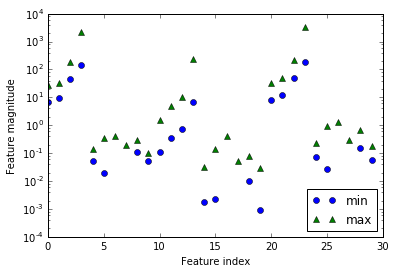

In [25]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline


plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

## Preprocessing data for SVM -Rescaling the data

SVMs,is very sensitive to the scaling of the data. Therefore, a common practice is to adjust the features so that the data representation is more suitable for these algorithms. Often, this is a simple per-feature rescaling and shift of the data

One way to resolve model overfitting problem is by rescaling each feature so that they are all approximately on the same scale. A common rescaling method for kernel SVMs is to scale the data such that all features are between 0 and 1. We will see how to do this using the MinMaxScaler

In [26]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)

# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training

print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum for each feature
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [27]:
# use THE SAME transformation on the test set,
# using min and range of the training set (see Chapter 3 for details)
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.955
Accuracy on test set: 0.937


### MinMaxScaler

In [28]:
from sklearn.preprocessing import MinMaxScaler

# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm =SVC()
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))


Scaled test set accuracy: 0.94


In [29]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))


SVM test accuracy: 0.97


### Tuning the parameters
The gamma parameter is the one shown in the formula given in the previous section, which controls the width of the Gaussian kernel. It determines the scale of what it means for points to be close together. The C parameter is a regularization parameter, similar to that used in the linear models. It limits the importance of each point

In [30]:
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring =  'accuracy'

# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' ,  'poly' ,  'rbf' ,  'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)

model = SVC()

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

/home/ubuntu/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ubuntu/.local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Best: 0.985915 using {'kernel': 'linear', 'C': 0.3}
0.983555 (0.015144) with: {'kernel': 'linear', 'C': 0.1}
0.842525 (0.056939) with: {'kernel': 'poly', 'C': 0.1}
0.943466 (0.040110) with: {'kernel': 'rbf', 'C': 0.1}
0.945958 (0.036788) with: {'kernel': 'sigmoid', 'C': 0.1}
0.985936 (0.011485) with: {'kernel': 'linear', 'C': 0.3}
0.868494 (0.054936) with: {'kernel': 'poly', 'C': 0.3}
0.957697 (0.027583) with: {'kernel': 'rbf', 'C': 0.3}
0.967110 (0.033902) with: {'kernel': 'sigmoid', 'C': 0.3}
0.985880 (0.015695) with: {'kernel': 'linear', 'C': 0.5}
0.873200 (0.047299) with: {'kernel': 'poly', 'C': 0.5}
0.962403 (0.032195) with: {'kernel': 'rbf', 'C': 0.5}
0.964673 (0.038744) with: {'kernel': 'sigmoid', 'C': 0.5}
0.983555 (0.015144) with: {'kernel': 'linear', 'C': 0.7}
0.889590 (0.044790) with: {'kernel': 'poly', 'C': 0.7}
0.969491 (0.028108) with: {'kernel': 'rbf', 'C': 0.7}
0.962292 (0.037201) with: {'kernel': 'sigmoid', 'C': 0.7}
0.983499 (0.018534) with: {'kernel': 'linear', 'C': 

Scaling the data made a huge difference! Now we are actually in an underfitting regime, where training and test set performance are quite similar but less close to 100% accuracy. From here, we can try increasing either C or gamma to fit a more complex model. For example:

### Decision Boundaries
1. What are decision boundaries?
>Demonstrate the classification result by ploting the decision boundery
Sample usage of Nearest Neighbors classification. It will plot the decision boundaries for each class:

In [31]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets

def decision_plot(X_train, y_train, n_neighbors, weights):
       h = .02  # step size in the mesh

Xtrain = X_train[:, :2] # we only take the first two features.

#================================================================
# Create color maps
#================================================================
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


#================================================================
# we create an instance of SVM and fit out data. 
# We do not scale ourdata since we want to plot the support vectors
#================================================================

C = 1.0  # SVM regularization parameter

svm = SVC(kernel='linear', random_state=0, gamma=0.2, C=C).fit(Xtrain, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(Xtrain, y_train)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(Xtrain, y_train)
#lin_svc = svm.LinearSVC(C=C).fit(Xtrain, y_train)


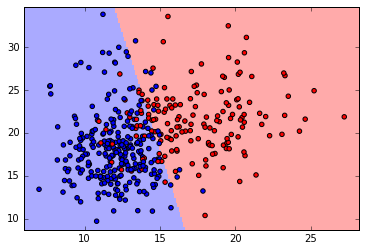

In [32]:
#================================================================
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
#================================================================
x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

#================================================================
 # Put the result into a color plot
#================================================================
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.title("2-Class classification (k = %i, weights = '%s')"
 #             % (n_neighbors, weights))
plt.show()


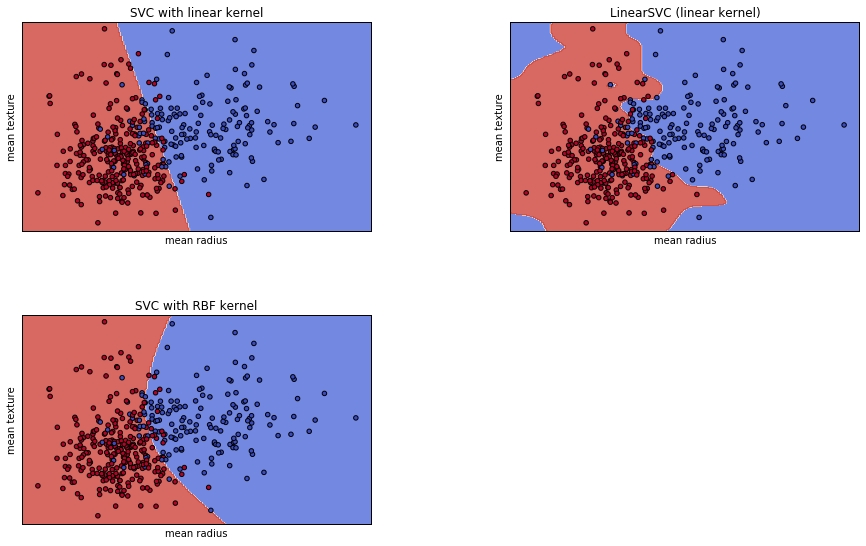

In [33]:
 %matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9) 
plt.rcParams['axes.titlesize'] = 'large'
    
    # create a mesh to plot in
x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svm, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('mean radius')
    plt.ylabel('mean texture')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

</div>
<div class="section" id="classification-accuracy using-confusion-matrix">
<h1 style="color:blue;">Classification Accuracy Using Confusion Matrix <a class="headerlink" href="#classification-accuracy using-confusion-matrix" title="Permalink to this headline">¶</a></h1>

Confusion matrix describes the performance of a classification table.
Every observation in the testing set is represented in the matrix. For a 2 classification problem with 2 responses is a 2 by 2 matrix.

~~~~
                        Model says "+"     Model says  "-"

      Actual: "+"       True positive   |   False negative
                      ----------------------------------
      Actual: "-"       False positive  |   True negative
  
~~~~

* **Basic Terminology**
  * True Positive Model correctly predicts tumor is benign (1- response
  * True Negative Model correctly predicts tumor is Malignant (0-response)
  * False Positive Model incorrectly predicts that the tumor is benign while it is not (Type 1 error)
  * False Negative Model incorrectly predicts that the tumor is benign, while it is not (Type II error)
  

In [1]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model = SVC(kernel='linear', random_state=0, gamma=0.2, C=0.3, probability=False)
model.fit(rescaledX, y_train)

# estimate accuracy on validation dataset
rescaledtestX = scaler.transform(X_test)
predictions = model.predict(rescaledtestX)
n_classes = cancer.target_names.shape[0]

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions, labels=range(n_classes)))
print(classification_report(y_test, predictions, target_names=cancer.target_names ))

NameError: name 'X_train' is not defined

In [47]:
#print the first 25 true and predicted responses
#print 'True:', (y_test.values)[0:25]
print 'Pred:', predictions[0:25]

 Pred: [1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0]


## Matrics computed from Confusion matrix


~~~~
                        Model says "+"     Model says  "-"

      Actual: "+"       50 (TP )     |       3 (FN)
                      ----------------------------------
      Actual: "-"       1  (FP)      |       89 (TN)
  
~~~~



### Description of Results
1. **Classification Accuracy** - Answers the question how often is the classifier correct?? TP+TN/Total
  * An accuracy score of 97% indicates that svm classifier is 97% correct in predicting the tumor is 

2. **Confusion Matrix**
 - Majority of the prediction fall on the diagonal line of the matrix, of the 53 Malignant diagnosis, 50 were correctly classified as malignant tumor, and of the 90 Benign predictions, 89 were classified as benign tumor. 

3. **Summary of classification report**.
 * Precision/positive predicted value(PPV) - Statistical measure that describes the performance of a diagnostic test. 
   * When a positive value is predicted, how often is the predicition correct?(How precise is the classifier when predicting positives instances. In this case, SVM Classifier is 97% precise in predicting a malignat(cancerous) tumor
 
 * Recall/Sensitivity/True Positive rate (TPR) - Quantifies avoidance of false negatives- When the actual value is positive, how often is the value correct..."How sensitivy the classifier is in detecting a positive instance?
    *  **94% (50/53)of the patients classified as having a malignant tumor, while 99% (89/90)classified as having a benign tumor** 
    * In general the SVM classifier is 97% correct, in predicting when the actual value is positive
    
 * f1-Score - F1 score (also F-score or F-measure) is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score. f1-Score = 2x((Precision* Recall)/(Precision+Recall)) (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

### Conclusion
* Confusion matrix gives you a more compplete picture of how well your classier is performaing
* Allows you to compute various calassification metrics and these metrics can guide your model selction

### Which Metrics should you focus on?
* Choice of metric depends on **business objective**
* **Spam filter** (positve class is spam); Optimize for precision or specificity because false negatives (spam goes into inbox) are more acceptable than false positives (non-spam is caught by spam filter)
* **Fradulent transaction dector** (positive class is "fraud). Optimize for sensitivity because false positives (normal transactions that are flagged as possible frauds) are more acceptable that false negatives (fradulent transactions that are not detected)

 ### Adjusting The Classification Threshold /Optimizing parameters



In [1]:
#print the first 10 predicted response
svm.predict(X_test)[0:10]

NameError: name 'svm' is not defined

### Receiver operating characteristic (ROC) curve. 

In statistical modeling and machine learning, a commonly-reported performance measure of model accuracy is Area Under the Curve (AUC), where, by “curve”, the ROC curve is implied. ROC is a term that originated from the Second World War and was used by radar engineers (it had nothing to do with machine learning or pattern recognition).

In [49]:
# Plot the receiver operating characteristic curve (ROC).
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(20,10))
probas_ = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
#plt.axes().set_aspect(1)

AttributeError: predict_proba is not available when  probability=False

### Reference
https://github.com/InesdeSantiago/machine_learning_cca1/blob/master/Module2.py